<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/07_dimensional%20reduce/07_pca_math_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#  Dimensionality reduce - PCA method

A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation ](#1)
3. [PCA](#2)
4. [Percentage comparison of explained variance](#3)


### <a name='0'></a> Import libraries

In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from keras.datasets import mnist



### <a name='1'></a> Data generation

In [24]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(10000,)


In [29]:
# Cut first 5000 pictures
X_train=X_train[:5000]
y_train=y_train[:5000]
y_train[0]

5

Visualisation a sample picture

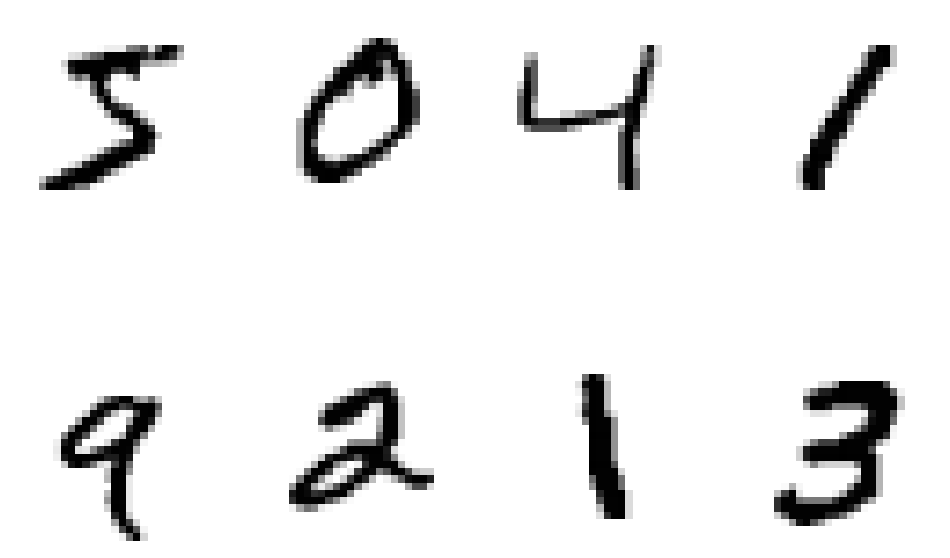

In [41]:

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
 #  plt.title(y_train[i], color='black', fontsize=17)- Appears 'str' error
    plt.axis('off')
plt.show()
     

In [44]:
#Flatten a pictures
X_train=X_train.reshape(-1, 28*28)
X_train.shape

(5000, 784)

In [45]:
#Standarization
X_train=X_train/255

### <a name='2'></a> PCA

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_train_pca.shape

(5000, 148)

In [49]:
results=pd.DataFrame(data={'explained_variance_ratio':pca.explained_variance_ratio_})
results['cumulative']=results['explained_variance_ratio'].cumsum()
results['component']=results.index+1
results.head()

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5


In [52]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
              go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
              layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [53]:
X_train_pca[0].shape

(148,)

In [54]:
approx = pca.inverse_transform(X_train_pca)
approx[0].shape

(784,)

Viusalisation

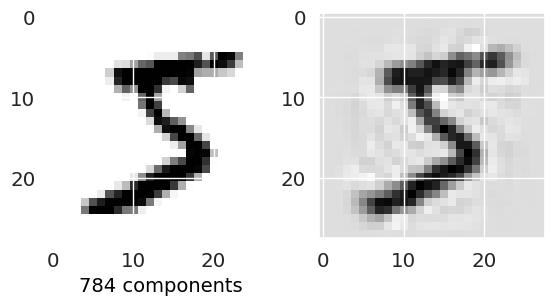

In [62]:
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel('784 components', color='black', fontsize=14)
#plt.title(label='Original image', color='black', fontsize=16)
#plt.title(label="ReLU function graph", fontsize=40, color="green")
plt.subplot(122)
plt.imshow(approx[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel(f'{pca.n_components_} components', color='white', fontsize=14)
#plt.title('95% variance', color='white', fontsize=16)
plt.show()

### <a name='3'></a> Percentage comparison of explained variance

In [67]:
def make_pca(n_components, data, idx=0):
  pca=PCA(n_components=n_components)
  data_pca=pca.fit_transform(data)
  approx = pca.inverse_transform(data_pca)

  plt.imshow(approx[idx].reshape(28, 28), cmap='gray_r', interpolation='nearest')
  plt.xlabel(f'{pca.n_components_} components', color='white', fontsize=12)
  #plt.title(f'{str(n_components)}% var', color='white', fontsize=15)


Visualisation 0

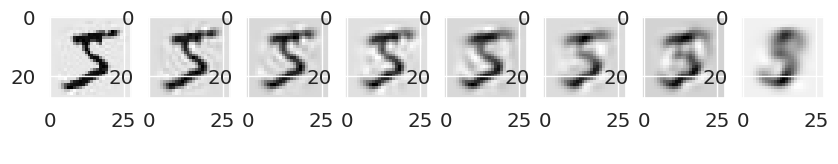

In [69]:
plt.figure(figsize=(10,8))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train)
plt.show()

Visualisation 9

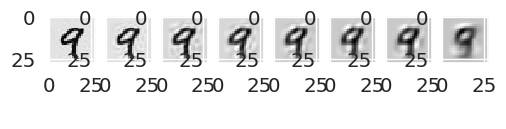

In [73]:
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(190+ i + 1)
    make_pca(val, X_train, idx=4)
plt.show()

Visualisation 0

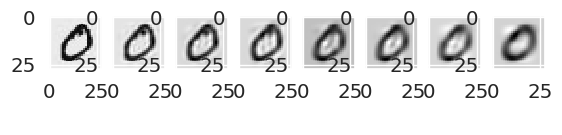

In [74]:
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=1)
plt.show()